# Fandango Rating Inflation

(Introductions should be no more than 2 paragraphs and should include what the project is about and what the goal of the project is.)

### Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest; he published his finding __[here](https://fivethirtyeight.com/features/fandango-movies-ratings/)__.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

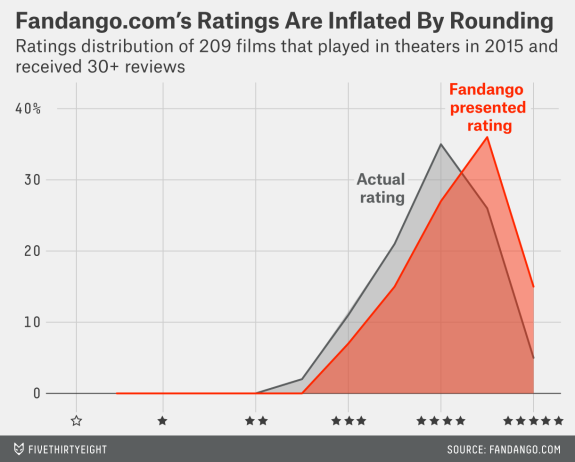
Source: __[FiveThriryEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)__

This project's purpose is to analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, there is ready-made data for both these periods of time:

* Walt Hickey make the data he analyzed publicly available on __[GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango)__ as `fandango_score_comparison.csv`. The data he collected will be used to analyze the characteristics of Fandango's rating system *previous* to his analysis. 
* One of the Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on __[GitHub](https://github.com/mircealex/Movie_ratings_2016_17)__ as `movie_ratings_16_17.csv`. This data will be used to analyze the rating system's characteristics *after* Hickey's analysis.

One can find the documentation of both datasets in the GitHub repositories liked above.

In [1]:
import pandas as pd
prev_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv"
previous = pd.read_csv(prev_url)

after_url = "https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv"
after = pd.read_csv(after_url)


In [2]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [3]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Below is the collection of data that incudes only information about Fandango's ratings. 
* For the data set with ratings previous to Hickey's analysis, the releant columns are : `'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'`.
* For the `after` data set, the only relevant columns are `'movie', 'year', 'fandango'`.

In [4]:
prev_fan = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_fan = after[['movie', 'year', 'fandango']].copy()

prev_fan.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [5]:
after_fan.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


The goal of this analysis is to determind whether there has been any change in Fandango's rating system since Hickey's article was published. Initially, after Hickey's analysis, Fandango's offical response claimed that the significant rounding up was due to bugs in their system and that they would fix the bugs immediately. Since this statement, all raw ratings values have been removed from the site's HTML.

The population of interest of the analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. Since we want to determine whether the parameters of this population changed after Hickey's analysis, we are sampling the population at two different periods in time - before and after Hickey's analysis - so it is possible to compare the two states.

The goals is to describe the population, so it is necessary to make sure that the samples are representative, otherwise one would expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the __[data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango)__, one can see that he used the following sample criteria:

* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample - some movies didn't have any chance. It's questionable wheter this sample is representative of the entire population of interest. It seems more likely that it isn't, mostly because this sample is subject to *temporal trends* - e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for the data set collected after Hickey's analysis can be read in the README.md of the __[data set's repository](https://github.com/mircealex/Movie_ratings_2016_17)__ and were:

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

The second sample is also subject to temporal trends and it's unlikely to be representative of the population of interest.

Both authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called **__[purposive sampling](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb)__** (or judgemental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for this analysis.

### Changing the Goal of the Analysis

At this point, one can either collect new data or modify the goal of the analysis. Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, the new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should be a fairly good proxy for the initial goal.

### Isolating the Samples Needed

The new research gols requires two populations:

1. All Fandango ratings for popular movies released in 2015.
2. All Fandango ratings for popular movies in 2016.

The term "popular" is vague and one needs to define it with precision before continuing. This analysis will continue with Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

One quick way to check the representativeity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings manually on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [6]:
# Check if most or all of each population is comprised of popular movies
sum(prev_fan['Fandango_votes'] < 30)

0

In [7]:
after_fan.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above the random seed value of 1 was used. (This is good practice because it suggests that we didn't try out various random seeds just to get a favorable sample.)

As of April 2018, these are the fan ratings:

|Movie|Fan ratings|
|-----|-----------|
|Mechanic: Resurrection| 2247|
|Warcraft|7271|
|Max Steel|493|
|Me Before You|5263|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

90% of the movies in the sample are popular. This is good enough to move forward with a bit more confidence.

If one were to explore the two data sets, one would notice that there are movies with a releasing year different than 2015 or 2016. For the purposes of this analysis, it's necessary to isolate only the movies released in 2015 and 2016.

In [8]:
# Create a 'Year' column in the prev_fan data set
prev_fan['Year'] = prev_fan['FILM'].str[-5:-1]

prev_fan.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [9]:
fan_2015 = prev_fan[prev_fan['Year'] == '2015'].copy()
print(fan_2015['Year'].value_counts())

2015    129
Name: Year, dtype: int64


In [10]:
fan_2016 = after_fan[after_fan['year'] == 2016]
print(fan_2016['year'].value_counts())

2016    191
Name: year, dtype: int64


### Comparing Distribution Shapes for 2015 and 2016

One way to determine if there is a difference between Fandango's ratings for popular movies in 2015 vs 2016 is to compare the distributions of movie ratings for the two samples.

We'll start by comparing the shapes of the two distributions using kernel density plots in the the __[FiveThirthyEight style](https://www.dataquest.io/blog/making-538-plots/)__ like the plot above.

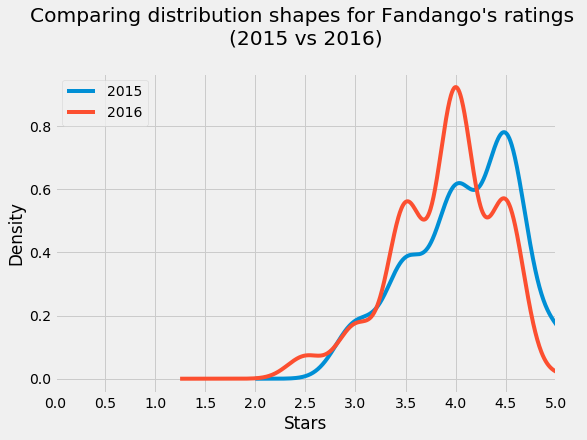

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fan_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))

fan_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings \n(2015 vs 2016)", y = 1.07)
# the 'y' parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5)
# because ratings start at 0 and end at 5
plt.xticks(arange(0, 5.1, .5))
plt.show()

Two aspects are striking on the figure above:

* Both distributions are strongly left skewed.
* The 2016 distibution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further - ideally in a separate project, since this is quite irrelevant to the current goal of this analysis.

The slight left shift of the 2016 distribution is very interesting for this analysis. Is shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference between Fandango's ratings for popular movies in 2015 versus 2016. One can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

### Comparing Relative Frequencies

To analyze more granular information, examine the frequency tables of the two distributions. Because the data sets have different number of movies, one should normalize the tables and show percentages.

In [12]:
print('2015' + '\n' + '-' * 16) # To help one distinguish between
                                # the two tables immediately and
                                #avoid silly mistakes as one reads
fan_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
print('2016' + '\n' + '-' * 16)
fan_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 - there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 - 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

In 2016 the percentage of movies rated with 3.5 and 4 inceased compared to 2015.  

### Determining the Direction of the Change

Summary statistics provide a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [14]:
mean_2015 = fan_2015['Fandango_Stars'].mean()
mean_2016 = fan_2016['fandango'].mean()

median_2015 = fan_2015['Fandango_Stars'].median()
median_2016 = fan_2016['fandango'].median()

mode_2015 = fan_2015['Fandango_Stars'].mode()[0] # the output of the Series.mode() is a bit uncommon
mode_2016 = fan_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


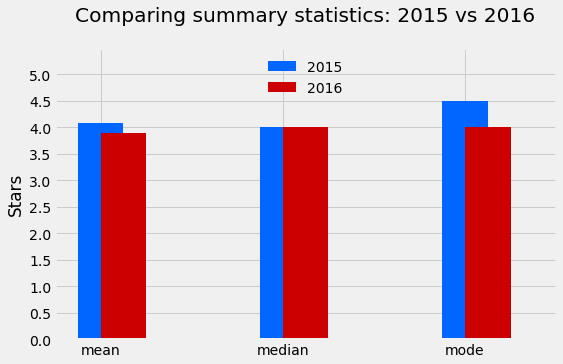

In [15]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating in 2016 was approximately 0.2 points lower. This means a drop of almost 5% relative to the mean rating in 2015. 

In [16]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what was seen for the mean, the direction of the change seen in the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

### Conclusion

The analysis showed that there was indeed a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. It was also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

One cannot be completely sure what caused the change, but the chances are very likely that it was caused by Fandango fixing the biased rating system after Hickey's analysis.